# Model Visualizations

### Notebook Summary:

#### Objective: provide visualizations to compare all modeling steps outcomes 

* Please go to the "modeling" directory to locate the relevant notebooks
* Relevant notebook names: "baseline_regression", "new_baseline_regression", "poly_regressions", "regularization", "ensembles"
* Models compared are: 
    * The initial Linear Regression baseline model
    * The new Linear Regression baseline after feature extraction, transformation, binarization, and ETL
    * Decision Tree, Support Vector, and KNN regressions
    * Linear Regression after adding interactions
    * Linear Regressions after adding interactions and performing feature selection
    * Lasso, Ridge, and Elastic Net regressions
    * Random Forest, Bagging, Adaboost, Gradient Boosting ensemble regressions

#### Conclusions: 
* We choose the tuned Lasso model for the best trade off between bias and variance 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.feature_selection import RFE, f_regression, RFECV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
import matplotlib.ticker as ticker

In [4]:
import sys
sys.path.append('./../lib')
from airbnb_modeling import detect_feature_importance, plot_residuals, plot_predictions, rank_to_dict, map_variable
from parse_methods import parse_columns

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
%store -r X_ratios
%store -r X_normed
%store -r X_test
%store -r y_normed
%store -r y_test
%store -r listings
%store -r y_test_quad

In [6]:
#Step 2 Scores
%store -r scores_lin
%store -r scores_tree
%store -r gs_results_svreg
%store -r gs_results_nn
%store -r lin_reg_rmse_test
#Step 3 Scores
%store -r scores_lin_intonly
%store -r scores_lin_ratios
%store -r scores_lin_ratios_fsel
%store -r scores_quad
#Step 4 Scores Not needed
#Step 5 Scores
%store -r best_rfr_scores

In [7]:
%store -r test_predictions_tree_reg
%store -r test_predictions_best_model_svr
%store -r test_predictions_best_model_kneigh
%store -r test_predictions_lin_reg_intonly
%store -r test_predictions_ratios_lin_reg_fs
%store -r test_predictions_quad_reg
#Step 4
%store -r test_predictions_lasso
%store -r test_predictions_ridge
%store -r test_predictions_en
#Step 5
%store -r test_predictions_rf
%store -r test_predictions_br
%store -r test_predictions_abr
%store -r test_predictions_gbr

In [8]:
#Dictionary containing feature importances for all models
%store -r ranks

In [9]:
#All the models
%store -r best_model_svr 
%store -r best_model_kneigh 
%store -r best_model_dtree 
%store -r lin_reg
%store -r chosen_model_lasso
%store -r chosen_model_ridge
%store -r chosen_model_en
%store -r abr_best
%store -r gbr_best
%store -r best_model_br
%store -r rfr_best

In [10]:
%store -r y_test_intonly
%store -r test_lin_ratios_nofs

In [11]:
%store -r train_scores_lasso
%store -r train_scores_ridge
%store -r train_scores_en
%store -r val_scores_lasso
%store -r val_scores_ridge
%store -r val_scores_en

In [12]:
%store -r train_scores_br
%store -r val_scores_br
###May not need the ones below
#%store train_scores_gb
#%store val_scores_gb
%store -r train_scores_abr
%store -r val_scores_abr
%store -r train_scores_gbr
%store -r val_scores_gbr
%store -r train_scores_rfr
%store -r val_scores_rfr

Plot for First Batch of Regressions

In [13]:
X = ['LR', 'Decision Tree Reg', 'Support Vector Reg', 'KNR', 'LR w Interactions', 'LR w Ratios', 'LR w Ratios+Feature Sel','Quadratic Reg']

In [14]:
train_errors = [np.sqrt(-scores_lin['train_neg_mean_squared_error'].mean()),
                np.sqrt(-scores_tree['train_neg_mean_squared_error'].mean())+.001,
                np.sqrt(-gs_results_svreg['mean_train_score'].mean()),
                np.sqrt(-gs_results_nn['mean_train_score'].mean()), 
                np.sqrt(-scores_lin_intonly['train_neg_mean_squared_error'].mean())+.001, 
                np.sqrt(-scores_lin_ratios['train_neg_mean_squared_error'].mean()),
                np.sqrt(-scores_lin_ratios_fsel['train_neg_mean_squared_error'].mean()),
                np.sqrt(-scores_quad['train_neg_mean_squared_error'].mean())+.001]

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [15]:
val_errors = [np.sqrt(-scores_lin['test_neg_mean_squared_error'].mean()),
              np.sqrt(-scores_tree['test_neg_mean_squared_error'].mean()),
              np.sqrt(-gs_results_svreg['mean_test_score'].mean()),
              np.sqrt(-gs_results_nn['mean_test_score'].mean()),
              np.sqrt(-scores_lin_intonly['test_neg_mean_squared_error'].mean()),
              np.sqrt(-scores_lin_ratios['test_neg_mean_squared_error'].mean()), 
              np.sqrt(-scores_lin_ratios_fsel['test_neg_mean_squared_error'].mean()),
              np.sqrt(-scores_quad['test_neg_mean_squared_error'].mean())]

In [16]:
test_errors = [lin_reg_rmse_test,
            np.sqrt(mean_squared_error(y_test, test_predictions_tree_reg)),
            np.sqrt(mean_squared_error(y_test, test_predictions_best_model_svr)),
            np.sqrt(mean_squared_error(y_test, test_predictions_best_model_kneigh)),
            np.sqrt(mean_squared_error(y_test_intonly, test_predictions_lin_reg_intonly)),
            test_lin_ratios_nofs,
            np.sqrt(mean_squared_error(y_test, test_predictions_ratios_lin_reg_fs)),
            np.sqrt(mean_squared_error(y_test_quad, test_predictions_quad_reg))]

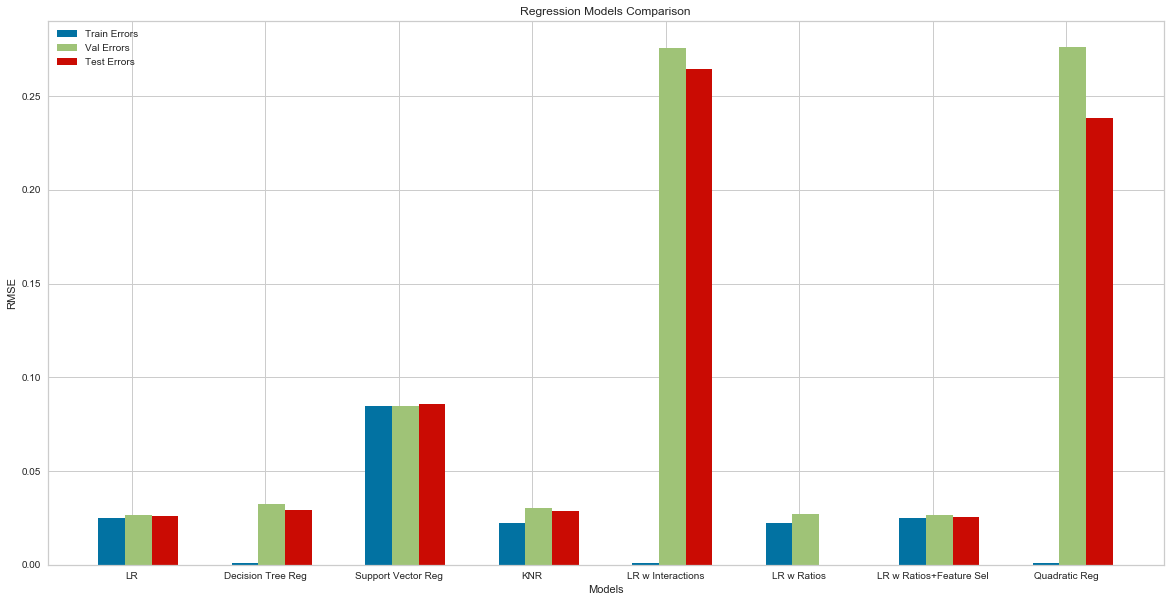

In [17]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)

x1 = [i-0.2 for i in range(len(train_errors))]
x2 = [i for i in range(len(train_errors))]
x3 = [i+0.2 for i in range(len(train_errors))]

ax.bar(x1, train_errors, width=0.2, color='b', label="Train Errors")
ax.bar(x2, val_errors, width=0.2, color='g', label="Val Errors")
ax.bar(x3, test_errors, width=0.2, color='r', label="Test Errors")

ax.set_xticklabels(X)
ax.xaxis.set_major_locator(ticker.FixedLocator([i-0.05 for i in x2]))

ax.legend()

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Regression Models Comparison')
plt.show()

Plot for Regularized Regressions

In [18]:
X = ['Lasso', 'Ridge', 'Elastic Net']

In [19]:
train_errors = [train_scores_lasso.mean(), train_scores_ridge.mean(), train_scores_en.mean()]
val_errors = [val_scores_lasso.mean(), val_scores_ridge.mean(), val_scores_en.mean()]
test_errors = [np.sqrt(mean_squared_error(y_test, test_predictions_lasso)),
               np.sqrt(mean_squared_error(y_test, test_predictions_ridge)), 
               np.sqrt(mean_squared_error(y_test, test_predictions_en))]

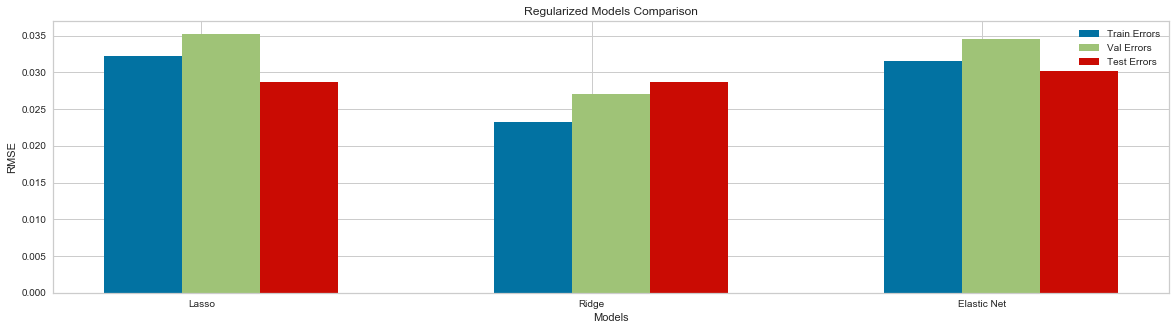

In [20]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)

x1 = [i-0.2 for i in range(len(train_errors))]
x2 = [i for i in range(len(train_errors))]
x3 = [i+0.2 for i in range(len(train_errors))]

ax.bar(x1, train_errors, width=0.2, color='b', label="Train Errors")
ax.bar(x2, val_errors, width=0.2, color='g', label="Val Errors")
ax.bar(x3, test_errors, width=0.2, color='r', label="Test Errors")

ax.set_xticklabels(X)
ax.xaxis.set_major_locator(ticker.FixedLocator([i-0.05 for i in x2]))

ax.legend()

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Regularized Models Comparison')
plt.show()

Plot for Ensembles

In [21]:
X = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting']

In [22]:
train_errors = [np.sqrt(-best_rfr_scores['train_neg_mean_squared_error'].mean()),
                train_scores_br.mean(),
                train_scores_abr.mean(),
                train_scores_gbr.mean()]

val_errors = [np.sqrt(-best_rfr_scores['test_neg_mean_squared_error'].mean()),
              val_scores_br.mean(),
              val_scores_abr.mean(),
              val_scores_gbr.mean()]

test_errors = [np.sqrt(mean_squared_error(y_test, test_predictions_rf)),
               np.sqrt(mean_squared_error(y_test, test_predictions_br)),
               np.sqrt(mean_squared_error(y_test, test_predictions_abr)),
               np.sqrt(mean_squared_error(y_test, test_predictions_gbr))]

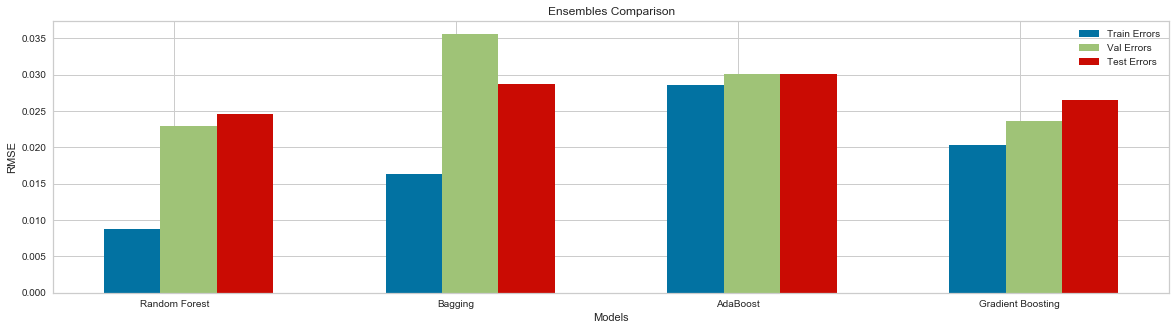

In [23]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)

x1 = [i-0.2 for i in range(len(train_errors))]
x2 = [i for i in range(len(train_errors))]
x3 = [i+0.2 for i in range(len(train_errors))]

ax.bar(x1, train_errors, width=0.2, color='b', label="Train Errors")
ax.bar(x2, val_errors, width=0.2, color='g', label="Val Errors")
ax.bar(x3, test_errors, width=0.2, color='r', label="Test Errors")

ax.set_xticklabels(X)
ax.xaxis.set_major_locator(ticker.FixedLocator([i-0.05 for i in x2]))

ax.legend()

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Ensembles Comparison')
plt.show()

In [24]:
importances = pd.DataFrame(ranks, columns=ranks.keys())

In [25]:
importances['mean'] = importances.mean(axis=1)

In [26]:
top_importances = importances[importances['mean']>0.1].sort_values(by='mean', ascending=False)

In [27]:
top_importances.shape

(19, 12)

Text(0.5,1,'Most Important Features Across All Models')

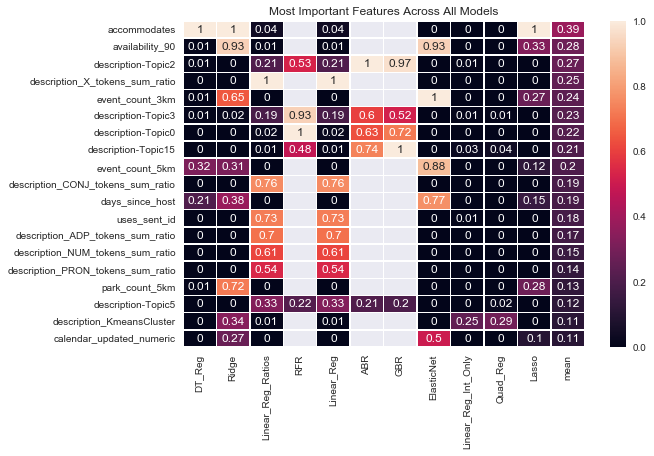

In [28]:
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(top_importances, annot=True, linewidths=.5, ax=ax).set_title('Most Important Features Across All Models')

In [29]:
importances[(importances['Ridge']>0)].sum()

DT_Reg                  1.800000
Ridge                  12.980000
Linear_Reg_Ratios       2.950000
RFR                     1.150000
Linear_Reg              2.950000
ABR                     1.210000
GBR                     1.010000
ElasticNet              4.990000
Linear_Reg_Int_Only     0.510000
Quad_Reg                0.550000
Lasso                   2.610000
mean                    4.457538
dtype: float64

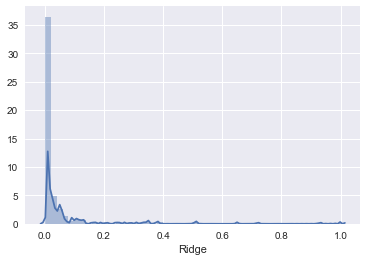

In [33]:
sns.distplot(importances['Ridge'])

In [34]:
temp = importances[importances['mean']>0.2].sort_values(by='mean', ascending=False)

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages

KeyboardInterrupt: 

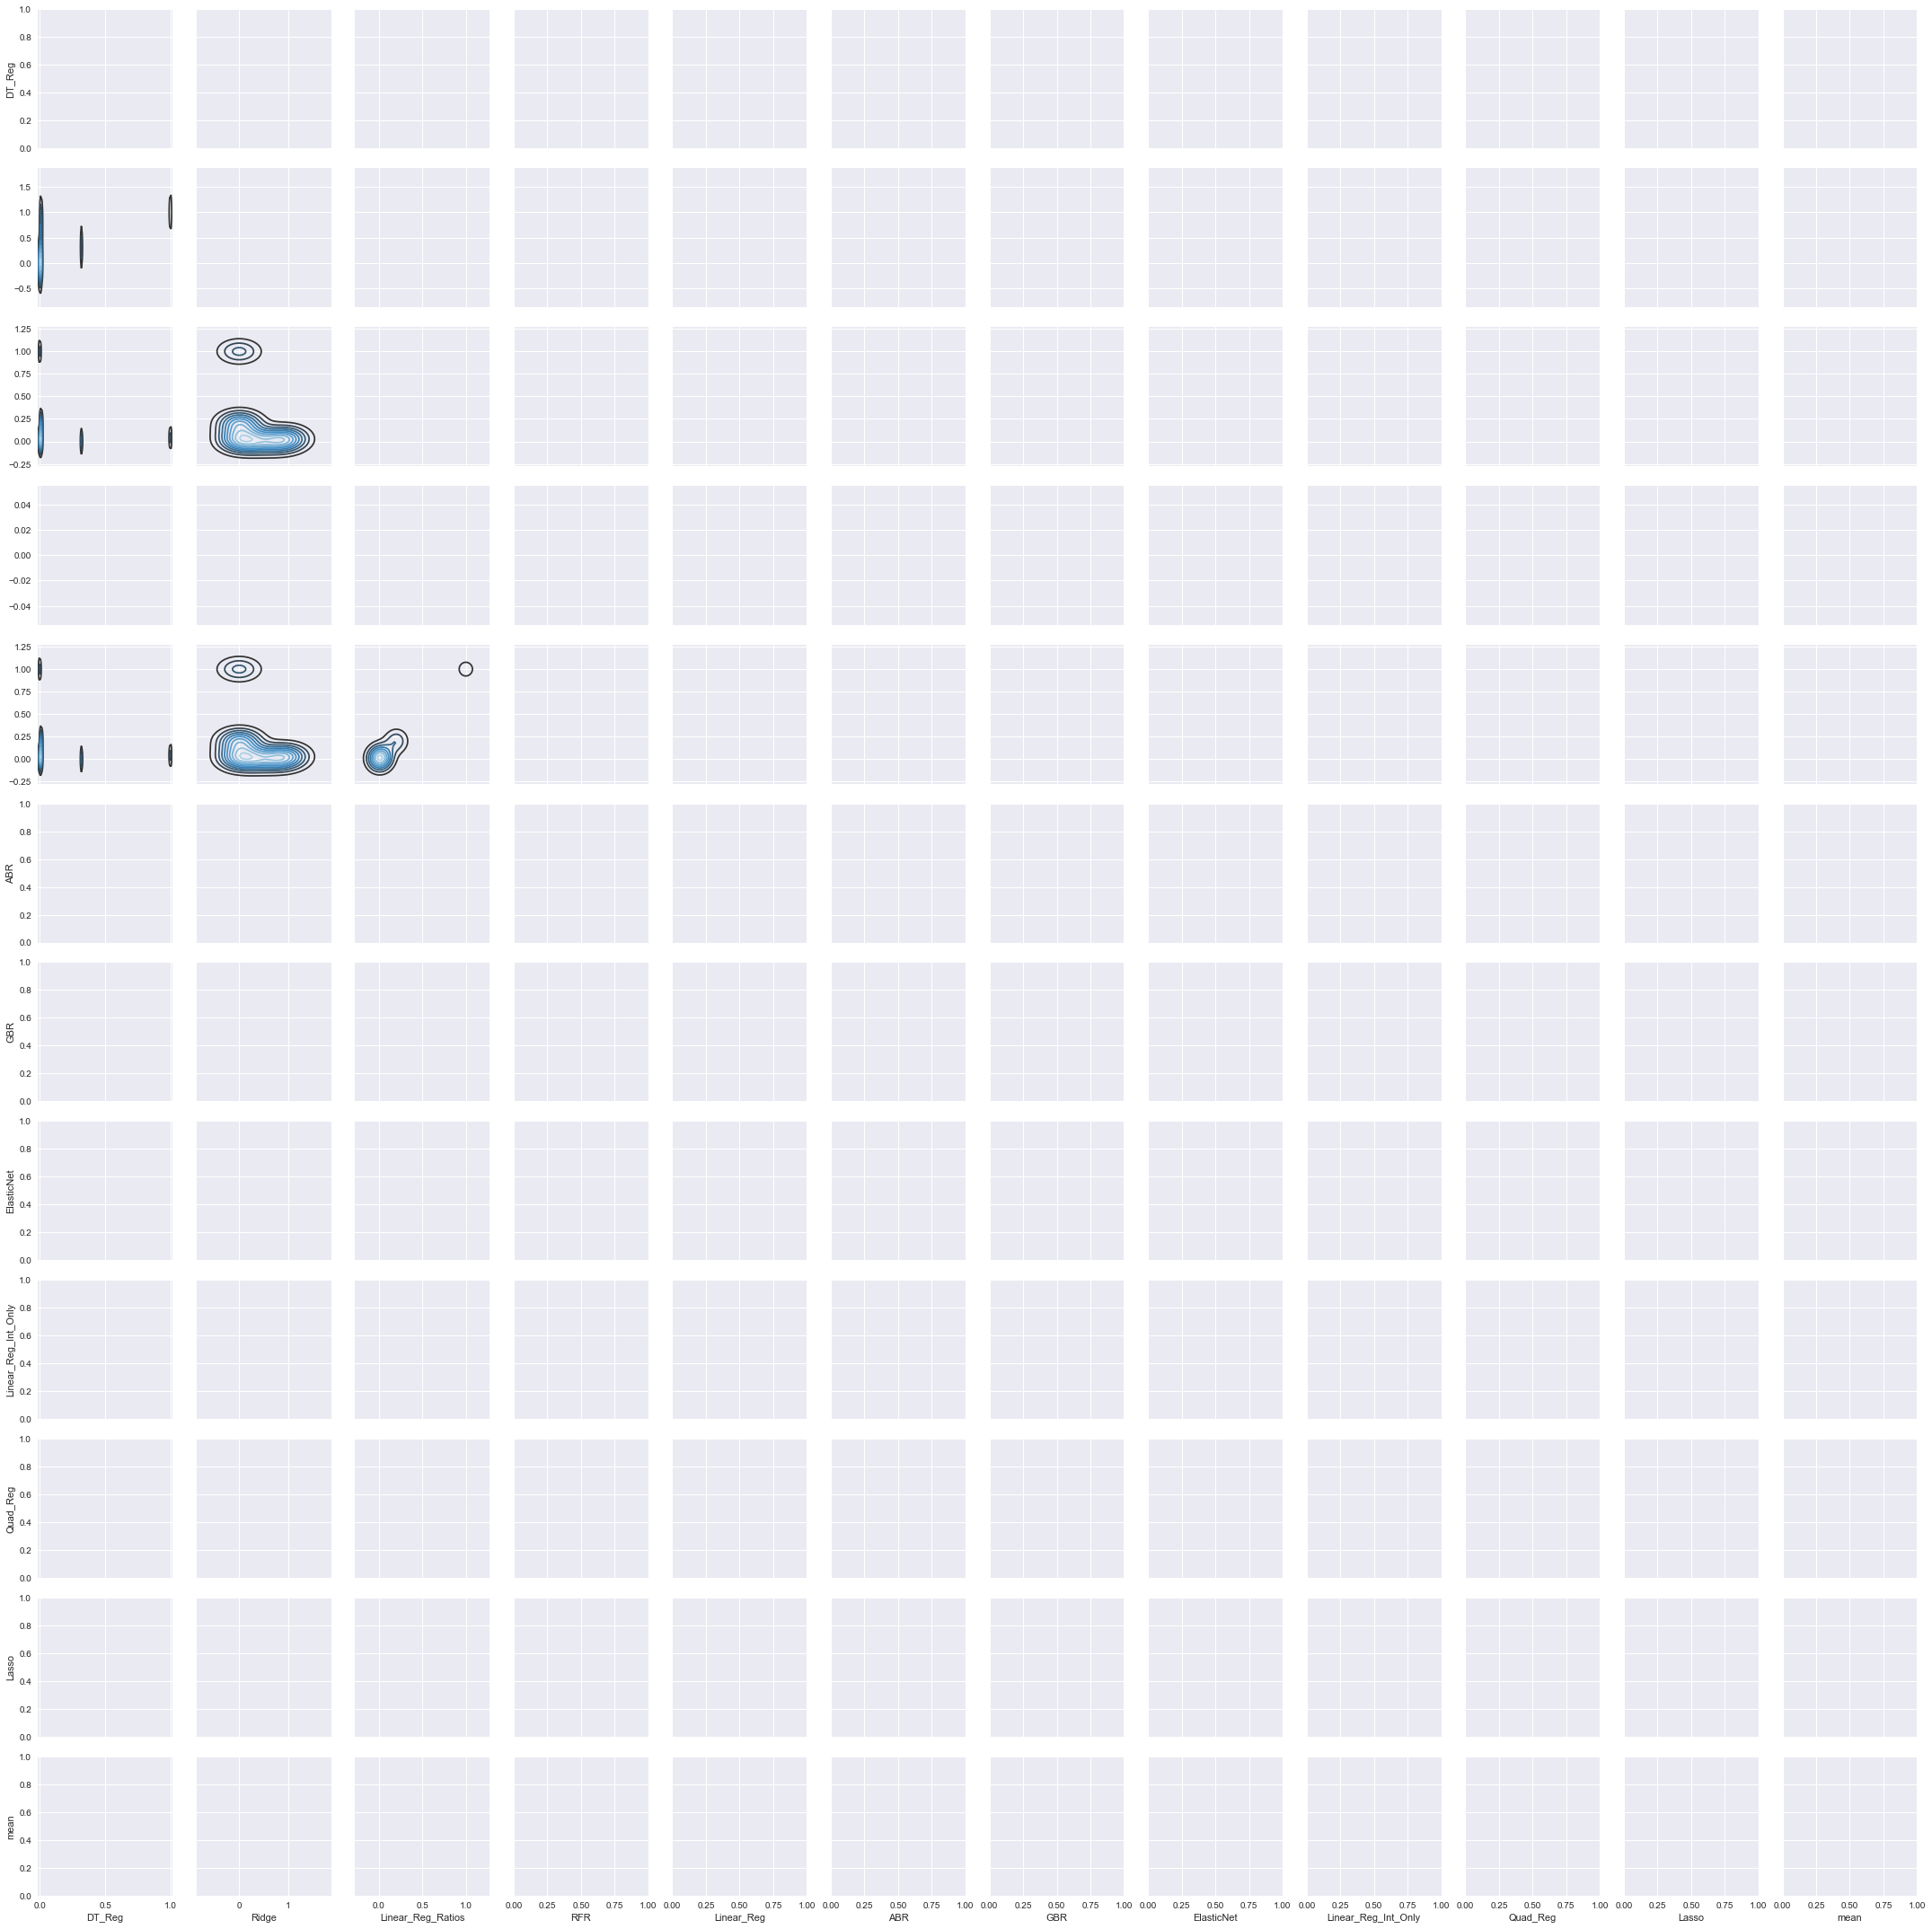

In [35]:
g = sns.PairGrid(temp, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)